In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
import warnings
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv("train.csv")

# EDA

### Data Visualization

In [74]:
#check if there are entries with null data attribtue
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39429 entries, 0 to 43956
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   39429 non-null  int64 
 1   fnlwgt                                39429 non-null  int64 
 2   capital-gain                          39429 non-null  int64 
 3   capital-loss                          39429 non-null  int64 
 4   hours-per-week                        39429 non-null  int64 
 5   native-country                        39429 non-null  object
 6   income_>50K                           39429 non-null  int64 
 7   education_10th                        39429 non-null  uint8 
 8   education_11th                        39429 non-null  uint8 
 9   education_12th                        39429 non-null  uint8 
 10  education_1st-4th                     39429 non-null  uint8 
 11  education_5th-6th           

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,67,366425,99999,0,60,United-States,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,17,244602,0,0,15,United-States,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,31,174201,0,0,40,United-States,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,58,110199,0,0,40,United-States,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,25,149248,0,0,40,United-States,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,59,105363,0,0,40,United-States,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,70,216390,2653,0,40,United-States,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
8,28,74784,0,0,50,United-States,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9,28,118089,4386,0,45,United-States,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,21,138513,0,0,25,United-States,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [26]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


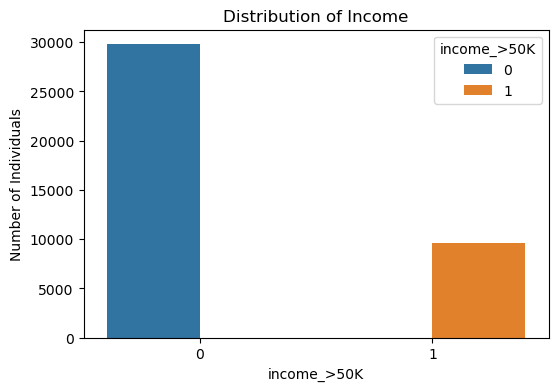

In [27]:
data['income_>50K'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.countplot(x='income_>50K', hue='income_>50K', data=data2)
plt.title('Distribution of Income')
plt.ylabel('Number of Individuals')
plt.show()

<AxesSubplot:xlabel='income_>50K', ylabel='age'>

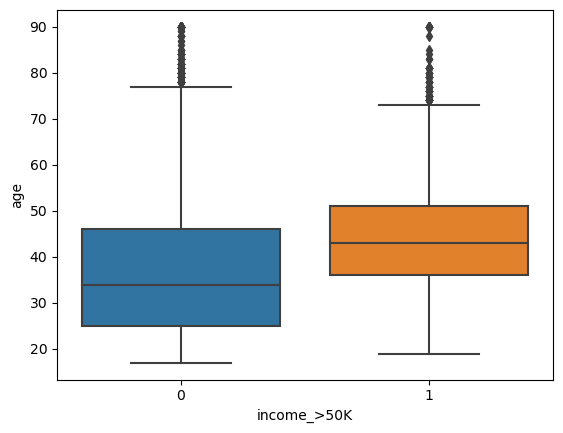

In [30]:
sns.boxplot(data = data, x='income_>50K', y='age')

<AxesSubplot:title={'center':'Distribution of Income by Industry'}, xlabel='workclass', ylabel='count'>

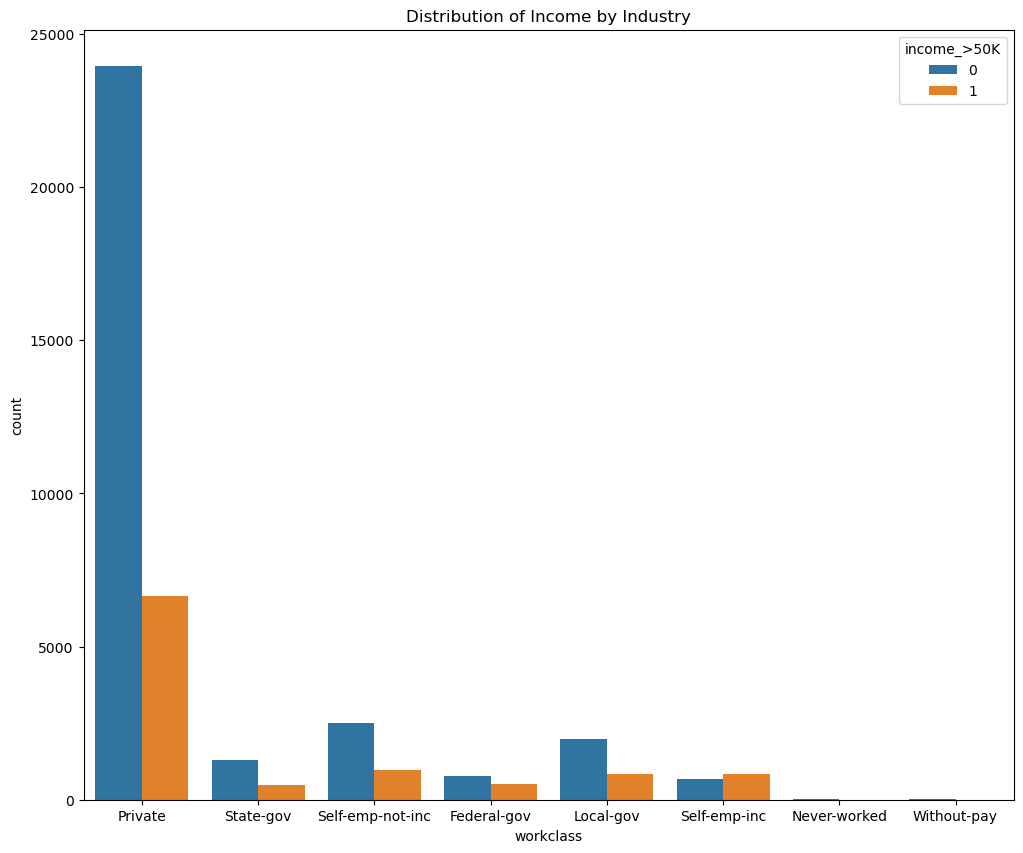

In [31]:
plt.figure(figsize=(12, 10))
plt.title('Distribution of Income by Industry')
plt.ylabel('Number of Individuals')
sns.countplot(x='workclass', hue='income_>50K', data=data)

<AxesSubplot:xlabel='race', ylabel='Count'>

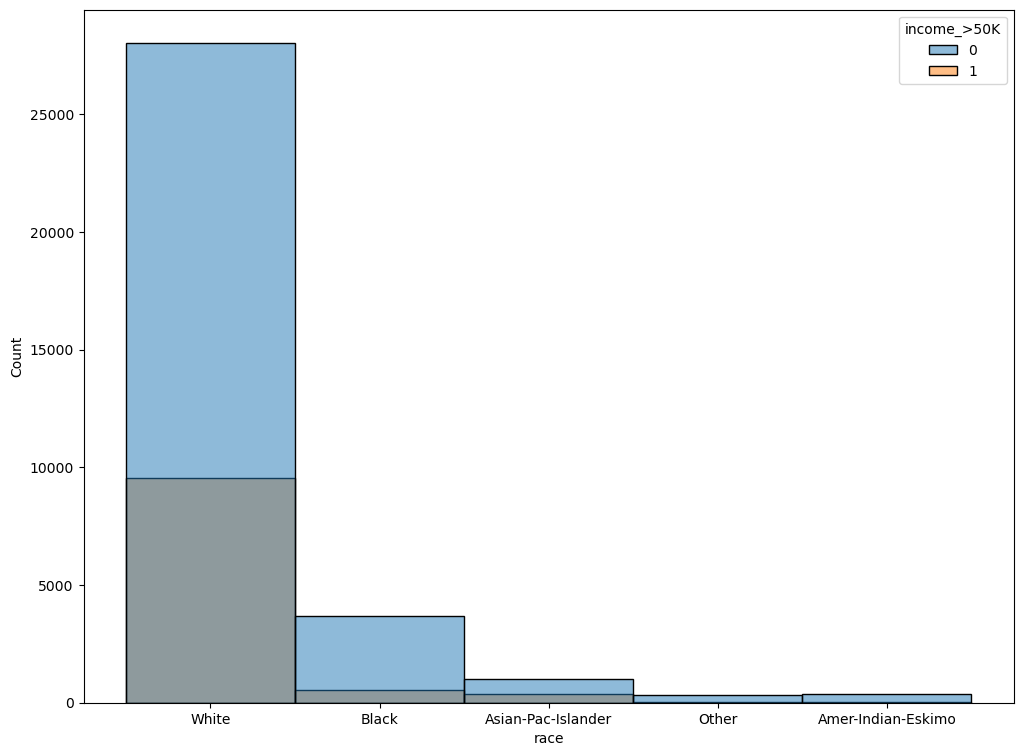

In [36]:
plt.figure(figsize=(12, 9))
sns.histplot(x=data['race'], hue=data['income_>50K'])

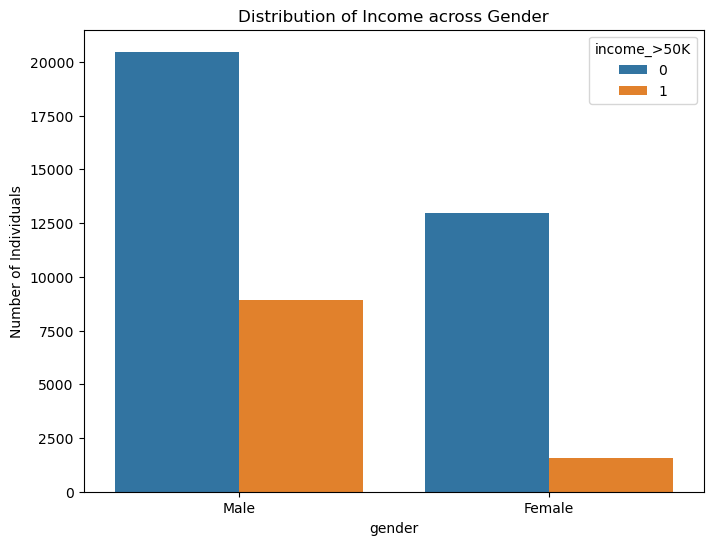

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income_>50K', data=data)
plt.title('Distribution of Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()

<AxesSubplot:xlabel='education', ylabel='count'>

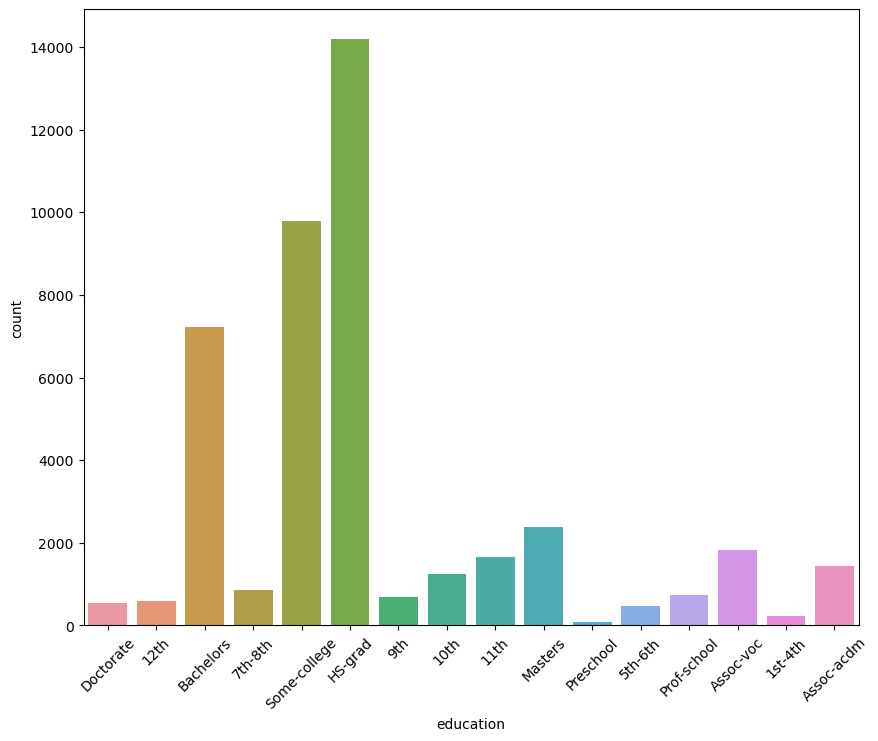

In [34]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.countplot(data=data, x = 'education')

<AxesSubplot:xlabel='occupation', ylabel='count'>

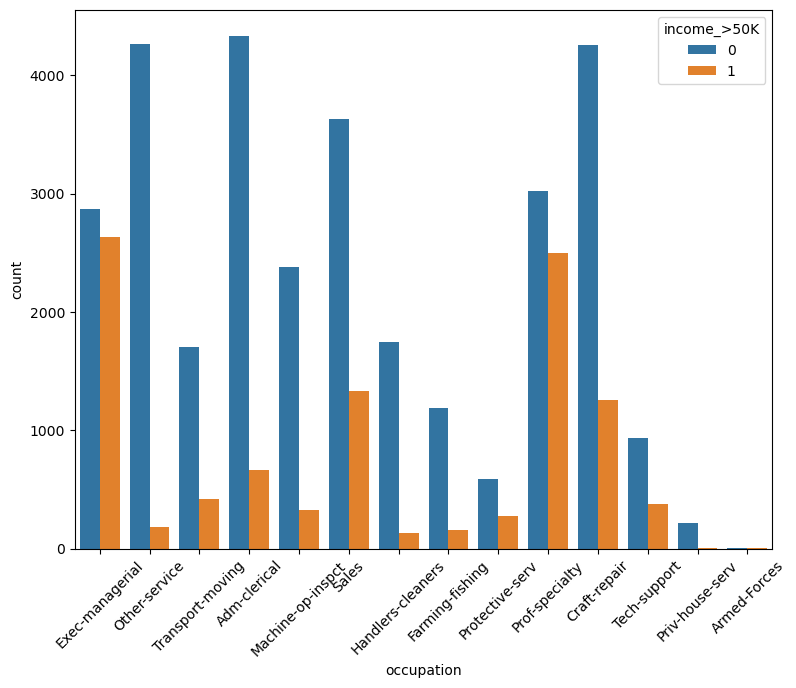

In [35]:
plt.figure(figsize=(9, 7))
plt.xticks(rotation=45)
sns.countplot(x='occupation', hue='income_>50K', data=data)

### visualize data corelation

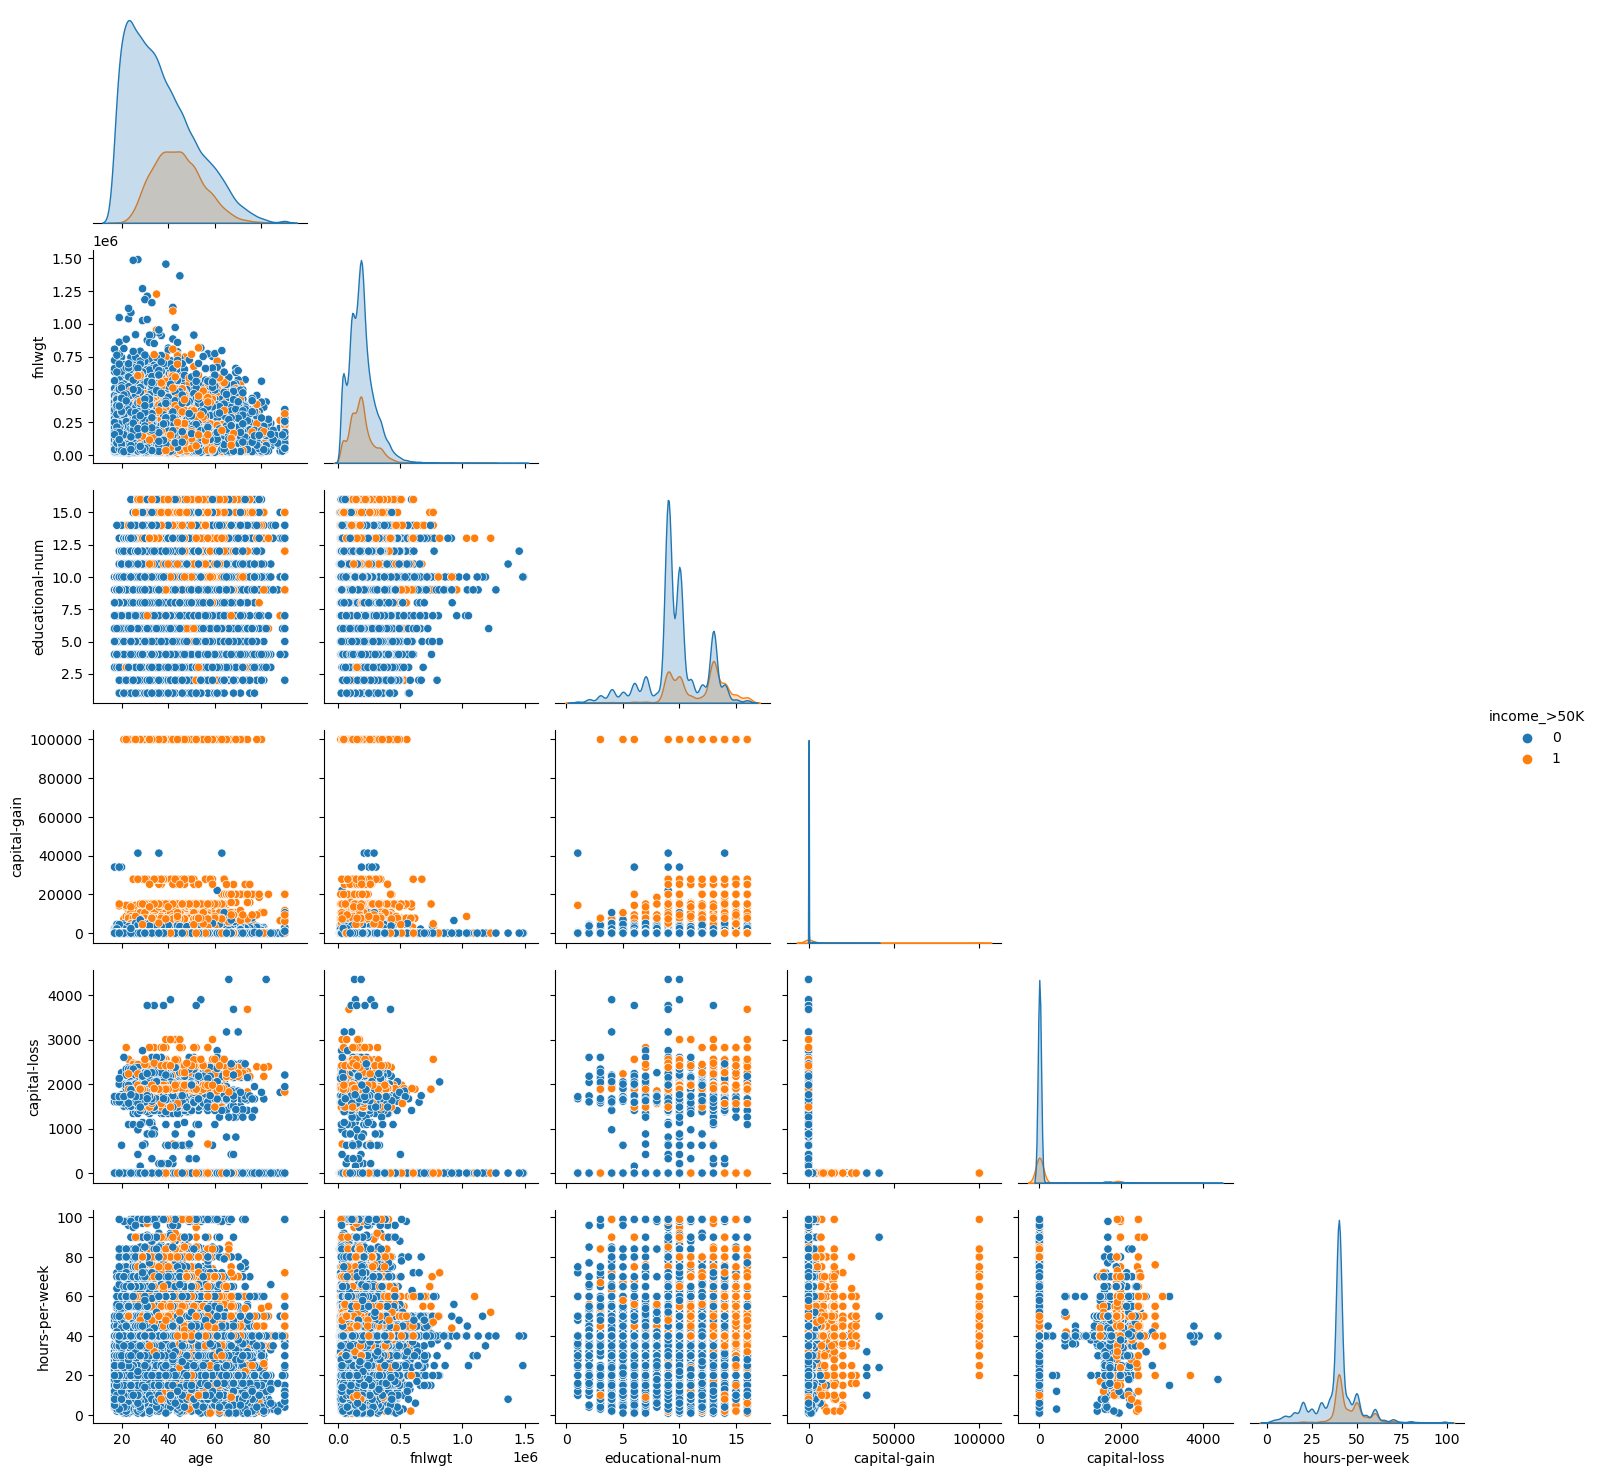

In [22]:
sns.pairplot(data,hue='income_>50K',corner=True)

<AxesSubplot:>

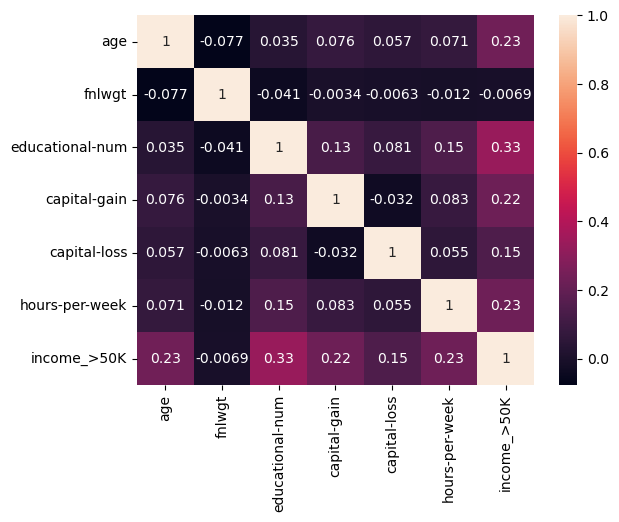

In [23]:
sns.heatmap(data.corr(), annot = True)

### Data processing

In [9]:
data = pd.read_csv("train.csv")
data['income_>50K'].value_counts(normalize=True)

<bound method DataFrame.value_counts of        age  workclass  fnlwgt     education  educational-num  \
0       67    Private  366425     Doctorate               16   
1       17    Private  244602          12th                8   
2       31    Private  174201     Bachelors               13   
3       58  State-gov  110199       7th-8th                4   
4       25  State-gov  149248  Some-college               10   
...    ...        ...     ...           ...              ...   
43952   52    Private   68982     Bachelors               13   
43953   19    Private  116562       HS-grad                9   
43954   30    Private  197947  Some-college               10   
43955   46    Private   97883     Bachelors               13   
43956   30    Private  375827       HS-grad                9   

           marital-status         occupation    relationship   race  gender  \
0                Divorced    Exec-managerial   Not-in-family  White    Male   
1           Never-married      Ot

76% of the data is < 50k, there is a imbalance class problem where we should make the two side of of the sample equal before training

Split x and y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Japan'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Ecuador'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'China'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Dominican-Republic'),
  Text(12, 0, 'Jamaica'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'Thailand'),
  Text(15, 0, 'Puerto-Rico'),
  Text(16, 0, 'Cuba'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Yugoslavia'),
  Text(20, 0, 'Iran'),
  Text(21, 0, 'El-Salvador'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'Scotland'),
  Text(28, 0, 'Columbia'),
  Text(29, 0, 'Outlying-US(Guam-USVI-etc)'),
  

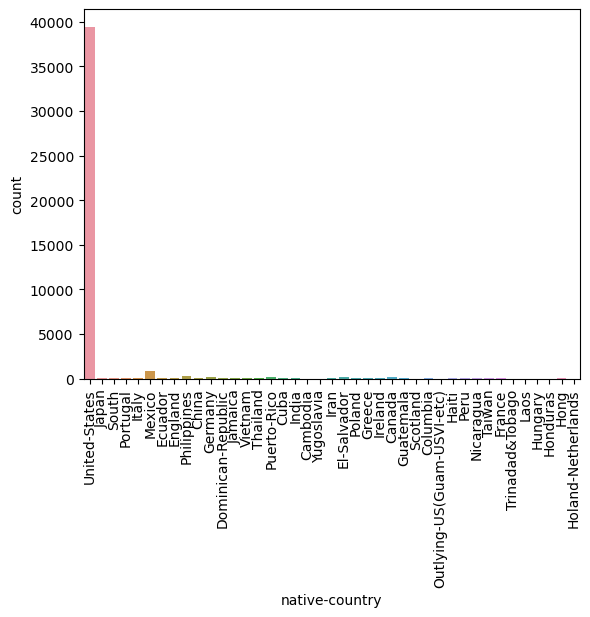

In [10]:
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

The data is mostly in United State, to be safe we can try to limit the model within the US.

In [11]:
data = data.copy().loc[(data['native-country'] == 'United-States'), :]
#Then we drop the country constrains
data.drop(columns=['native-country'],inplace=True)

In [12]:
data = pd.get_dummies(data, columns = ['education', 'workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender'])
print(data)

       age  fnlwgt  capital-gain  capital-loss  hours-per-week  income_>50K  \
0       67  366425         99999             0              60            1   
1       17  244602             0             0              15            0   
2       31  174201             0             0              40            1   
3       58  110199             0             0              40            0   
4       25  149248             0             0              40            0   
...    ...     ...           ...           ...             ...          ...   
43952   52   68982             0             0              50            1   
43953   19  116562             0             0              40            0   
43954   30  197947             0             0              58            0   
43955   46   97883             0             0              35            0   
43956   30  375827             0             0              40            0   

       education_10th  education_11th  education_12

Correcting imbalanced data

In [29]:
#split x and y
train, test = train_test_split(data, test_size=0.2, random_state=21)
x_train, y_train = train.drop(columns=['income_>50K']), train["income_>50K"]
x_test, y_test = test.drop(columns=['income_>50K']), test["income_>50K"]
# using randomoversampler to sove
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
x_train, y_train = ros.fit_resample(x_train, y_train)
x_test, y_test = ros.fit_resample(x_test,y_test)

In [30]:
print(y_train.value_counts(normalize= False)) # counting how much data we are still using
y_train.value_counts(normalize=True)

0    7687
1    7687
Name: income_>50K, dtype: int64


0    0.5
1    0.5
Name: income_>50K, dtype: float64

In [31]:
print(y_train)

40561    0
18379    0
13577    0
29118    0
20442    0
        ..
39113    1
16110    1
25888    1
18332    1
17069    1
Name: income_>50K, Length: 15374, dtype: int64


Rescale beccause the data is distribution is skewed

In [32]:
#scale the data, need to do after encoding
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)


In [36]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(scaled_x_train, y_train)

pred = logistic.predict(scaled_x_test)

accuracy = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)

accuracy

0.8213920163766633